<h1>Self organizing maps for Product Market Competition</h1>

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=d78a15f8f911667ec8b396d2b6e3fd6173f276e167bd9e08d416ae7cd6a496d5
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Patch
import plotly.express as px
from sklearn.cluster import KMeans
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

In [ ]:
DATA_DIR = '/content/drive/MyDrive/economic_systems/final data/Area 1 Product Market Competition (3).csv'

In [ ]:
data = pd.read_csv(f'{DATA_DIR}')
data = data[data.columns[1:]]
data.head()

,Country,Country Code,Product market regulation,Barriers to market entry,Business Freedom,Total business density rate,New business density rate,Closed business density rate,Intensity of local competition
0,Austria,AUT,1.44,4.0,75.5,17.30,0.51,NaN,5.629419
1,Belgium,BEL,1.69,3.0,80.6,78.83,3.71,2.68,5.802305
2,Bulgaria,BGR,1.93,2.5,64.3,36.75,1.96,0.24,4.813970
3,Bosnia and Herzegovina,BIH,1.38,4.0,49.3,14.48,1.09,0.84,4.491966
4,Switzerland,CHE,1.53,1.0,75.7,75.00,4.53,2.41,5.476600


In [ ]:
data = data.drop(columns=["Closed business density rate"])

In [ ]:
data.isnull().sum()

Country                           0
Country Code                      0
Product market regulation         0
Barriers to market entry          0
Business Freedom                  0
Total business density rate       0
New business density rate         0
Intensity of local competition    0
dtype: int64

In [ ]:
data = data.dropna(axis=0, thresh=5)

In [ ]:
data = data.fillna(data.median())

In [ ]:
data.isnull().sum()

Country                           0
Country Code                      0
Product market regulation         0
Barriers to market entry          0
Business Freedom                  0
Total business density rate       0
New business density rate         0
Intensity of local competition    0
dtype: int64

In [ ]:
COUNTRY_NAMES = data['Country'].values

Impute missing values with median since the variables have skewed distributions.

In [ ]:
data_not_scaled = data.copy(deep=True)

In [ ]:
scaler  = StandardScaler()
data[data.columns[2:]] = scaler.fit_transform(data[data.columns[2:]])
data.head()

,Country,Country Code,Product market regulation,Barriers to market entry,Business Freedom,Total business density rate,New business density rate,Intensity of local competition
0,Austria,AUT,0.020701,1.891332,0.016936,-1.028156,-1.056673,0.692608
1,Belgium,BEL,0.830739,0.857503,0.518474,-0.090711,-0.482914,1.056267
2,Bulgaria,BGR,1.608376,0.340589,-1.084479,-0.731824,-0.796689,-1.022657
3,Bosnia and Herzegovina,BIH,-0.173708,1.891332,-2.559589,-1.071121,-0.952679,-1.699978
4,Switzerland,CHE,0.312315,-1.210154,0.036605,-0.149063,-0.335888,0.371159


In [ ]:
N = len(data)
N

36

In [ ]:
import plotly.express as px

px.imshow(data[data.columns[2:]],color_continuous_scale='RdBu_r',aspect='auto',height=700,width=600, y = data['Country'].values)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Scaling the features to not affect the distance metric very much.

In [ ]:
category_color = {
    'Germany': 'red',
    'Sweden': 'red',
    'United Kingdom': 'red',
    'Spain': 'red',
    'Italy' : 'red'
}

<h3>Self organizing maps</h3>

In [ ]:
M =  math.floor(np.sqrt(5*np.sqrt(N)))
M

5

In [ ]:
feature_names = data.columns[2:]

som_size = M
som = MiniSom(som_size, som_size, len(data.columns[2:]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(data[data.columns[2:]].values)
som.train_random(data[data.columns[2:]].values, 5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.6872181009064119


In [ ]:
countries_map = som.labels_map(data[data.columns[2:]].values, COUNTRY_NAMES)

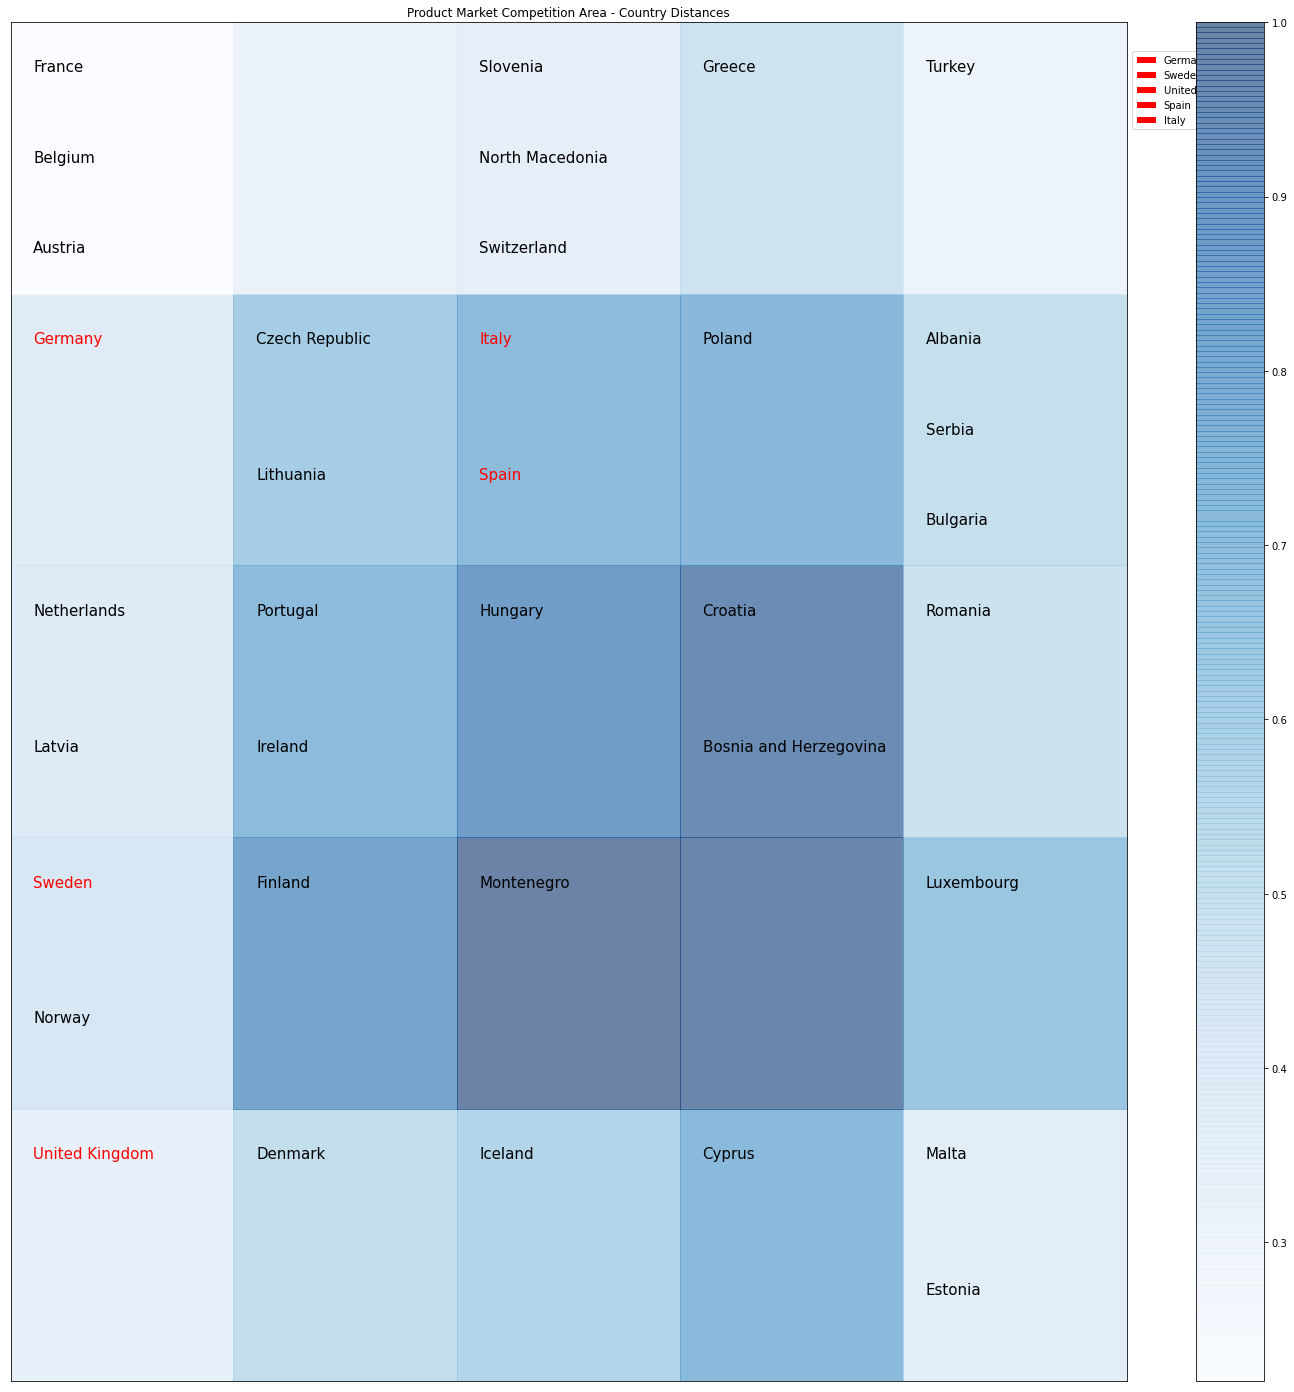

In [ ]:
fig = plt.figure(figsize=(25, 25))
short_names_map = {}

x_arr = []
y_arr = []
for p, countries in countries_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    x_arr.append(p[0])
    y_arr.append(p[1])
    for i, t in enumerate(countries):
        off_set = (i+1)/len(countries) + 0.12
        c = 'red' if t in category_color.keys() else 'black'
        plt.text(x, y+off_set, t, color=c, fontsize=15)
plt.pcolor(som.distance_map().T, cmap='Blues', alpha=.6)
plt.xticks(np.arange(som_size+1))
plt.yticks(np.arange(som_size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.title('Product Market Competition Area - Country Distances')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np

In [ ]:
for i, f in enumerate(feature_names):
  print(f)

Product market regulation
Barriers to market entry
Business Freedom
Total business density rate
New business density rate
Intensity of local competition


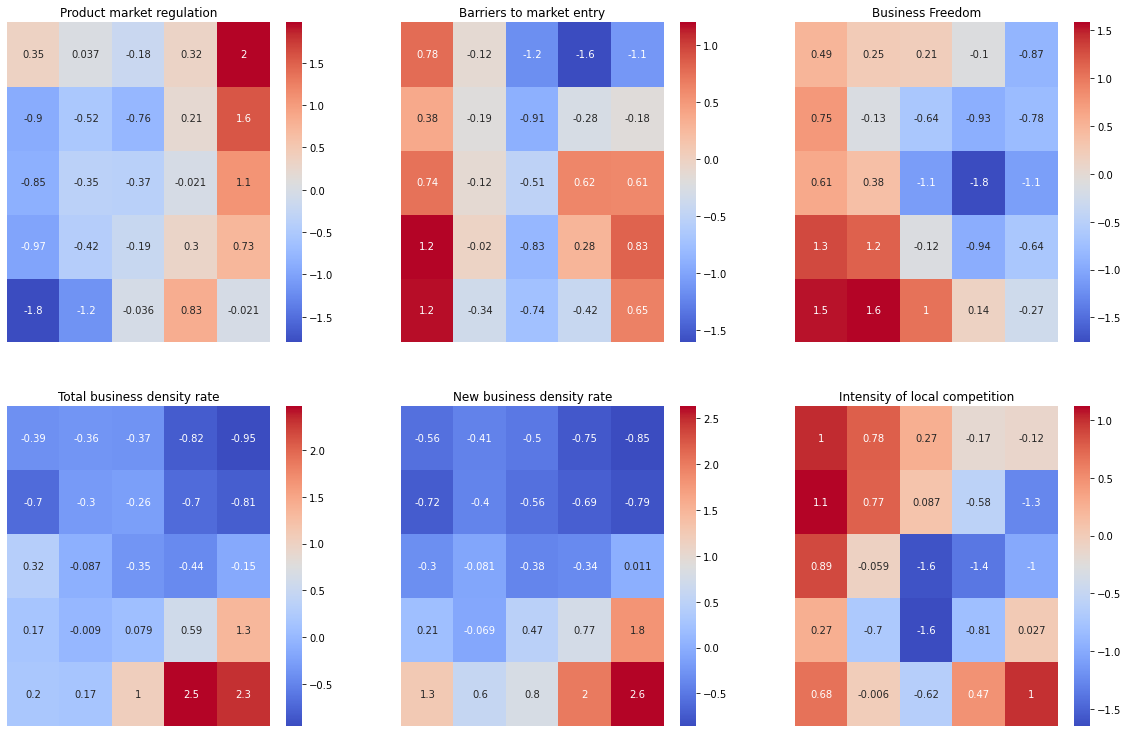

In [ ]:
W = som.get_weights()
size_plot = math.sqrt(len(feature_names))
size_plot = math.floor(size_plot)
plt.figure(figsize=(20, 20))
for i, f in enumerate(feature_names):
    plt.subplot(size_plot+1, size_plot+1, i+1)
    plt.title(f)
    #plt.pcolor(W[:,:,i].T, cmap='coolwarm',)
    ax = sns.heatmap(W[:,:,i].T, cmap='coolwarm', annot=True)
    ax.invert_yaxis()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
feature_names.values

array(['Product market regulation', 'Barriers to market entry',
       'Business Freedom', 'Total business density rate',
       'New business density rate', 'Intensity of local competition'],
      dtype=object)

[-1.79940097  1.17220799  1.53436823  0.1981159   1.26376775  0.67661368]
(0, 0) - feature Business Freedom
[-0.9749322   1.19714297  1.29808388  0.16606658  0.20726246  0.27382207]
(0, 1) - feature Business Freedom
[-0.85249123  0.74292892  0.61463036  0.31680391 -0.29580094  0.88972242]
(0, 2) - feature Intensity of local competition
[-0.89658152  0.37808916  0.75476515 -0.70005304 -0.72132341  1.12260946]
(0, 3) - feature Intensity of local competition
[ 0.34891177  0.77646824  0.49342789 -0.39488644 -0.56010918  1.02415513]
(0, 4) - feature Intensity of local competition
[-1.15600933 -0.33857302  1.5830344   0.1661856   0.60116426 -0.0059627 ]
(1, 0) - feature Business Freedom
[-0.41906232 -0.02024736  1.1621251  -0.00896769 -0.06902615 -0.70254882]
(1, 1) - feature Business Freedom
[-0.34590953 -0.11942677  0.38310108 -0.08725831 -0.08062664 -0.0591837 ]
(1, 2) - feature Business Freedom
[-0.51985471 -0.19287504 -0.13011892 -0.29881283 -0.4014581   0.77142202]
(1, 3) - feature Int

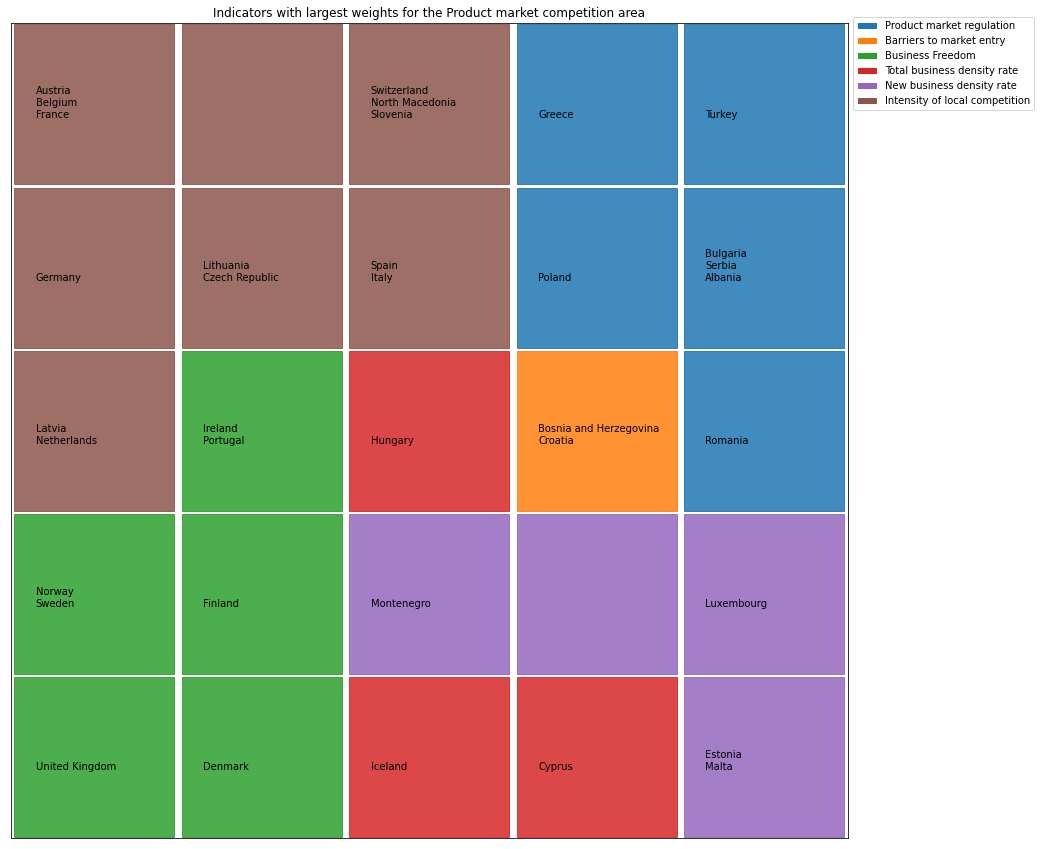

In [ ]:
Z = np.zeros((som_size, som_size))
plt.figure(figsize=(15, 15))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        countries = countries_map[(i, j)]
        text = ""
        for c in countries:
          text += c + "\n"
        plt.text(i + 0.15, j + 0.35, text, color='black', fontsize=10)
        print(W[i, j , :])
        feature = np.argmax(W[i, j , :])
        print(f"({i}, {j}) - feature {feature_names[feature]}")
        plt.plot([i+.5], [j+.5], 'o', color='C'+str(feature),
                  marker='s', markersize=160, label=text, alpha=0.85)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, som_size])
plt.ylim([0, som_size])
plt.xticks([])
plt.yticks([])
plt.title('Indicators with largest weights for the Product market competition area')
plt.show()

In [ ]:
som_neuron_values = {}
countries = data['Country'].values
for i, c in enumerate(data[data.columns[2:]].values):
  xi, yi = som.winner(c)
  weights = som.get_weights()[xi][yi]
  som_neuron_values[countries[i]] = weights

In [ ]:
reference_countries = category_color.keys()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_vals = []
for item in som_neuron_values.items():
    if item[0] not in reference_countries:
        node = {}
        node['Country'] = item[0]
        node['Germany'] = "{:.4f}".format(euclidean_distances([item[1]],[som_neuron_values['Germany']])[0][0])
        node['United Kingdom'] = "{:.4f}".format(euclidean_distances([item[1]],[som_neuron_values['United Kingdom']])[0][0])
        node['Sweden'] = "{:.4f}".format(euclidean_distances([item[1]],[som_neuron_values['Sweden']])[0][0])
        node['Italy'] = "{:.4f}".format(euclidean_distances([item[1]],[som_neuron_values['Italy']])[0][0])
        node['Spain'] = "{:.4f}".format(euclidean_distances([item[1]],[som_neuron_values['Spain']])[0][0])
        euclidean_vals.append(node)

In [ ]:
distances = pd.DataFrame(euclidean_vals)
#distances.to_csv('../../data/results_euclidean/product_market_competition_distances.csv', index=False)
distances

,Country,Germany,United Kingdom,Sweden,Italy,Spain
0,Austria,1.3810,3.1071,2.0109,2.4943,2.4943
1,Belgium,1.3810,3.1071,2.0109,2.4943,2.4943
2,Bulgaria,3.8100,5.2539,4.1293,2.8608,2.8608
3,Bosnia and Herzegovina,3.6840,4.6368,3.7370,2.5174,2.5174
4,Switzerland,2.0137,3.6613,2.8568,1.0785,1.0785
5,Cyprus,4.6852,4.1450,3.9800,4.1907,4.1907
6,Denmark,2.2450,1.8986,1.6449,2.6341,2.6341
7,Estonia,4.7195,3.6277,3.8352,4.5561,4.5561
8,Finland,2.1879,2.6809,1.6940,2.2487,2.2487
9,France,1.3810,3.1071,2.0109,2.4943,2.4943
